# read the throuputs

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : July 26th 2023
- update : July 27th 2023

** Kernel anaconda3_auxtel**

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
from matplotlib.patches import Rectangle

In [2]:
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy import fftpack
from scipy.optimize import curve_fit
from scipy.odr import Model,ODR,RealData
from scipy import linalg

In [3]:
DATE = "2023-January-17-18"
FILTERTYPE = "empty~holo4_003"
SITE = "AUXTEL"
spectractormode = "psf2dffm"
FLAG_POLAR = False
target = "mucol"

In [10]:
filenames = ["dataout/MLfit_bouguer_linearfitsmoothGP-2023-January-17-18-mucol.csv","dataout/MLfit_bouguer_linearfitsmoothGPsmoothGP-absbadremoved-2023-January-17-18-mucol.csv"]
tags = ["all point","abs band point removed"]
data_colors = ['blue','red']

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [6]:
dict_absbands = {} 
dict_absbands["O3"] = (560.,640.,0)
dict_absbands["O2_1"] = (685.,695.,1)
dict_absbands["O2_2"] = (760.,770.,1)
dict_absbands["H2O_1"] = (715.,735.,2)
dict_absbands["H2O_2"] = (815.,835.,2)
dict_absbands["H2O_3"] = (925.,980.,2)
absbands_colors = ['yellow','cyan','green']

In [7]:
all_df = []

for filename in filenames:
    df = pd.read_csv(filename,index_col=0)
    all_df.append(df) 

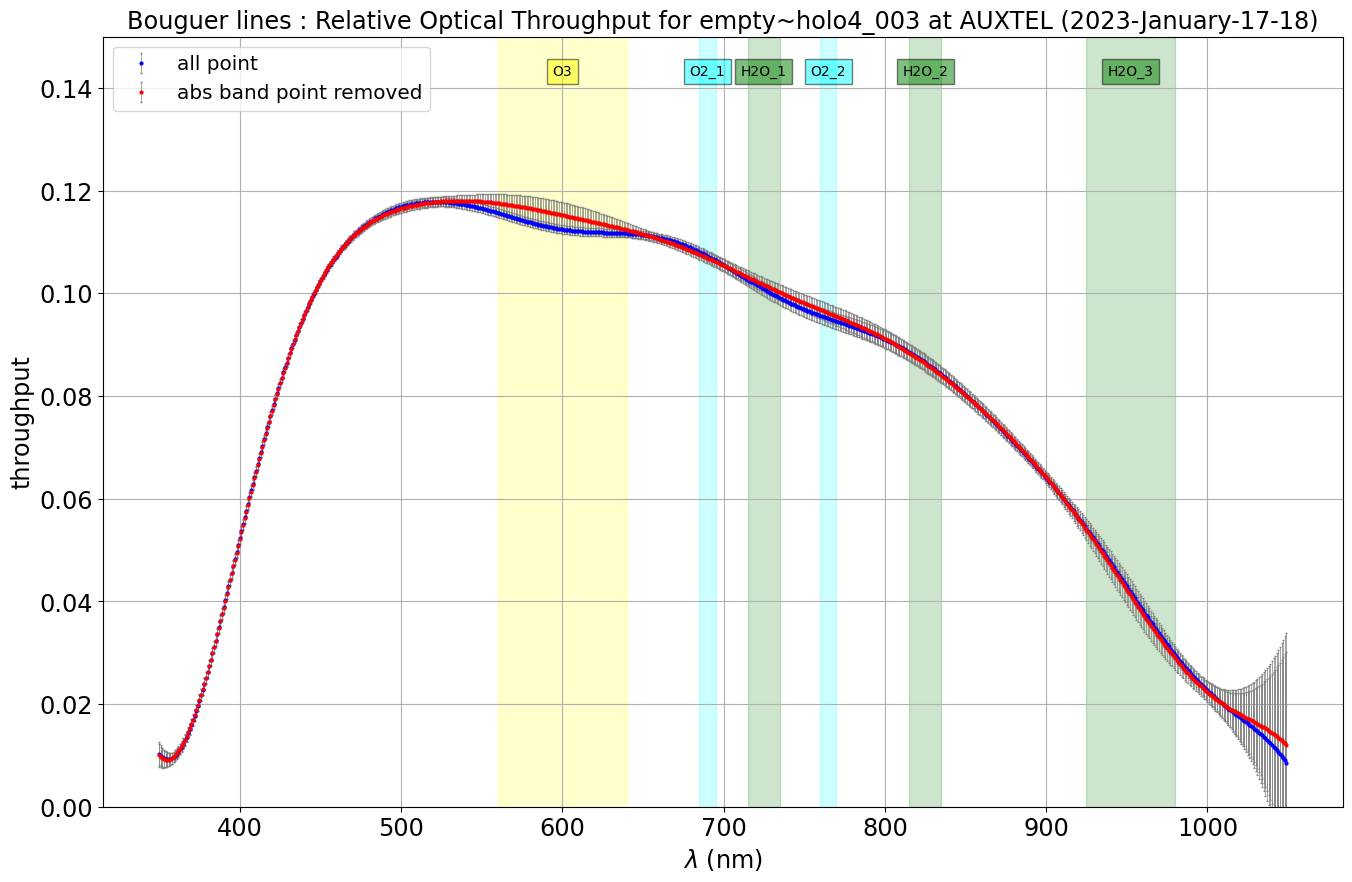

In [17]:
fig = plt.figure(figsize=(16,10))
ax=fig.add_subplot(111)


for idx,df1 in enumerate(all_df):
    
    X1=df1["wavelength"].values
    Y1=df1["throu"].values
    EY1= df1["errthrou"].values
    ax.errorbar(X1,Y1, yerr=EY1, xerr=None, fmt='o',color=data_colors[idx],ecolor="grey", ms=2 ,elinewidth=0.5, capsize=0.5,label=tags[idx])

ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("throughput")
title=f"Bouguer lines : Relative Optical Throughput for {FILTERTYPE} at {SITE} ({DATE})"
ax.set_title(title)
ax.grid()
ax.legend()

the_ymin=0
the_ymax = 0.15
the_yscale = the_ymax-the_ymin

ax.set_ylim(the_ymin,the_ymax)

for item in dict_absbands.items():
    key = item[0]
    val = item[1]
    idx_abscolor = val[2] 
    the_x = (val[0]+val[1])/2.
    the_y = the_ymax - 0.05* the_yscale
    rect = Rectangle((val[0],the_ymin),val[1]-val[0],the_ymax,linewidth=1,edgecolor=absbands_colors[idx_abscolor],facecolor=absbands_colors[idx_abscolor],alpha=0.2)
    ax.add_patch(rect)
    ax.text(the_x, the_y, key, horizontalalignment='center',bbox=dict(facecolor=absbands_colors[idx_abscolor], alpha=0.5))

        

ax.legend()
        